# Metric Clustering

## Dr. Cristian López Del Alamo
------


# Metric Clustering  

## 1. Load the dataset

In [ ]:
import numpy as np
import sklearn.datasets as dataset

digitos = dataset.load_digits()
X , Y = digitos.data, digitos.target
print(X.shape)

(1797, 64)


## 2. Dimensionality Reduction in case it is necessary

In [ ]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
#X = X[1:len(Y)-50,:]
#Y = Y[1:len(Y)-50]

pca = TSNE(n_components=2)
X_pca = pca.fit_transform(X)

#pca_variance = np.cumsum(pca.explained_variance_ratio_)
#print(pca_variance)
#plt.plot(range(1, len(pca_variance) + 1), pca_variance, marker='o')







## 3. Apply a clustering method

Text(0.5, 1.0, 'PCA cancer Data Set')

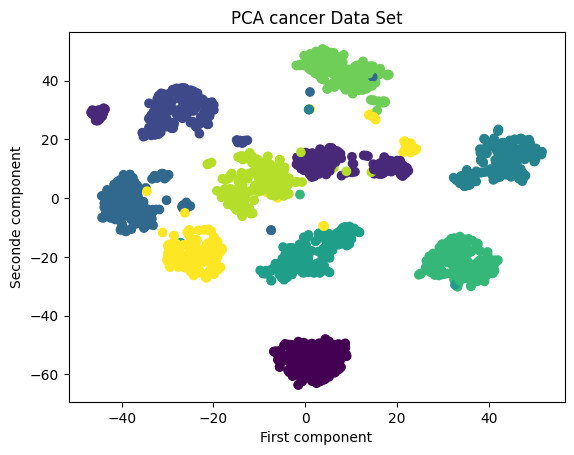

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state= 0)
kmeans.fit(X_pca)
predicted_labels = kmeans.labels_

plt.scatter(X_pca[:,0],X_pca[:,1], c = Y, cmap= 'viridis')
plt.xlabel("First component")
plt.ylabel("Seconde component")
plt.title("PCA cancer Data Set")

## 4. Measure the quality of the cluster.

### 4.1 Internal methods
We use this methods only when we don't have real labeles.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Métodos Internos
silhouette = silhouette_score(X_pca, predicted_labels)
print("Silhouette Score:", silhouette)
calinski_harabasz = calinski_harabasz_score(X_pca, predicted_labels)
print("calinski_harabasz Score:", calinski_harabasz)
davies_bouldin = davies_bouldin_score(X_pca, predicted_labels)
print("davies_bouldin Score:", davies_bouldin)

Silhouette Score: 0.64062095
calinski_harabasz Score: 5182.0798898364355
davies_bouldin Score: 0.505418948387877


### 4.2 External  methods

We use  method when we have the labels

In [ ]:

from sklearn.metrics import  adjusted_rand_score, homogeneity_score

# Métodos Externos
ari = adjusted_rand_score(Y, predicted_labels)
print("ari Score:", ari)
homogeneity = homogeneity_score(Y, predicted_labels)
print("homogeneity Score:", homogeneity)




ari Score: 0.8826249788498559
homogeneity Score: 0.9075024932833242


## 5. Evaluate the correct number of clusters.
### 5.1 Elbow method

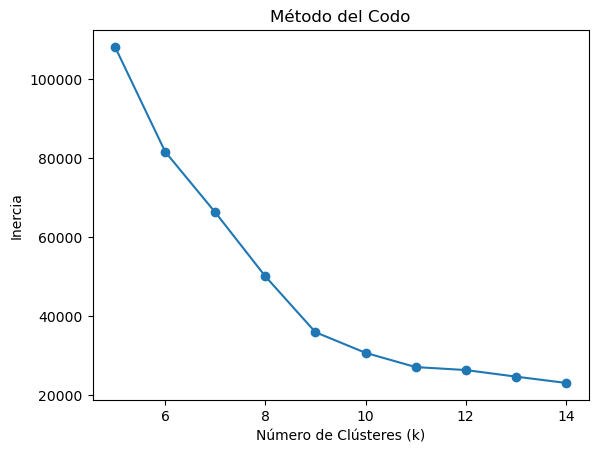

In [ ]:
inertias = []
k_values = range(5, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

###  5.2 Silhouette Method

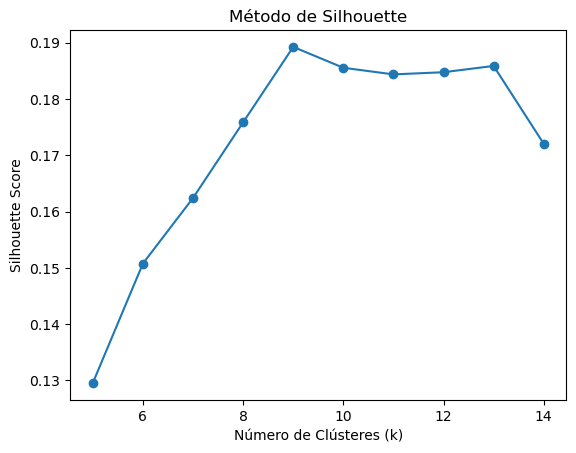

In [ ]:
silhouette_scores = []

for k in range(5, 15):  # El Silhouette Score requiere al menos dos clústeres
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(5, 15), silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método de Silhouette')
plt.show()

###  5.3 Calinski-Harabasz Method

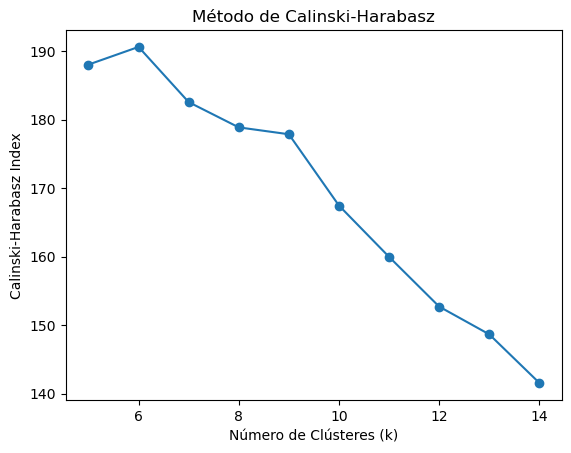

In [ ]:
calinski_scores = []

for k in range(5, 15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    calinski_scores.append(calinski_harabasz_score(X, labels))

plt.plot(range(5, 15), calinski_scores, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Método de Calinski-Harabasz')
plt.show()

###  5.4 Davies-Bouldin Method

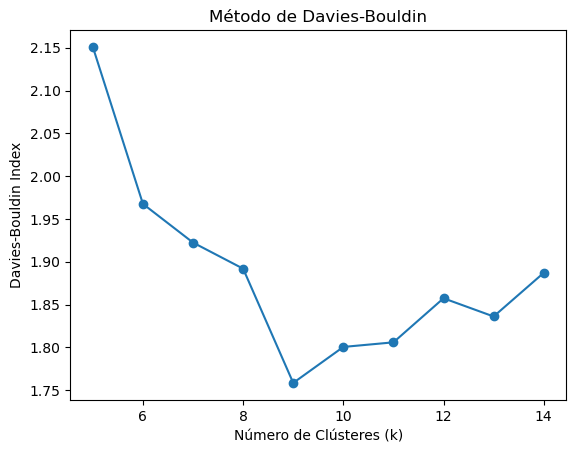

In [ ]:
davies_scores = []

for k in range(5, 15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    davies_scores.append(davies_bouldin_score(X, labels))

plt.plot(range(5, 15), davies_scores, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Método de Davies-Bouldin')
plt.show()

# 6. Example of exhaustive analysis with K-means and Rand Index

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
data = load_digits()
X = data.data
Y = data.target

tsne = TSNE(n_components= 2)
X_tsne = tsne.fit_transform(X)

import warnings
warnings.filterwarnings('ignore')



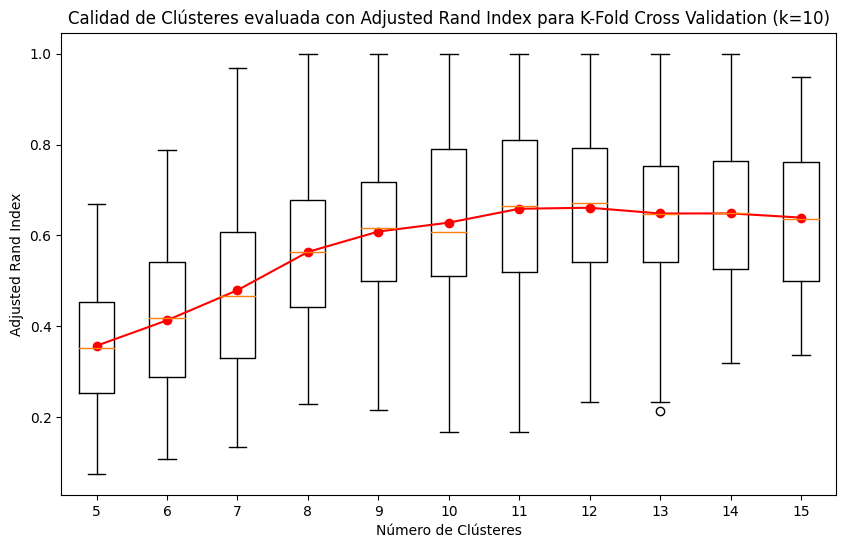

In [ ]:
kfolt = KFold(n_splits= 100, shuffle= True, random_state=0)
cluster_Range = range(5,16)

ari_score = { k: [] for k in  cluster_Range}

for k in cluster_Range:
    for train_index, test_index in kfolt.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X_train)
        y_pred = kmeans.predict(X_test)

        ari = adjusted_rand_score(y_test, y_pred)
        ari_score[k].append(ari)

ari_means = [np.mean(ari_score[k]) for k in cluster_Range]
plt.figure(figsize=(10, 6))
plt.boxplot([ari_score[k] for k in cluster_Range], labels=list(cluster_Range))
plt.plot(range(1, len(cluster_Range) + 1), ari_means, color='red', marker='o', linestyle='-', label="Media de ARI")
plt.xlabel('Número de Clústeres')
plt.ylabel('Adjusted Rand Index')
plt.title('Calidad de Clústeres evaluada con Adjusted Rand Index para K-Fold Cross Validation (k=10)')
plt.show()
